In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [6]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
id="1EYULXaLP9WmztWl-RnWUfR8J9uohf43p"

In [7]:
imported=drive.CreateFile({'id':id})
imported.GetContentFile('Fake.csv')

In [8]:
id="1RrScJ1wWUBpPdeTQWuNeH9fUb2i7NYfV"

In [9]:
imported=drive.CreateFile({'id':id})
imported.GetContentFile('True.csv')

In [10]:
import pandas as pd

In [12]:
df_fake=pd.read_csv('Fake.csv')

In [13]:
df_true=pd.read_csv('True.csv')

In [14]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [15]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [17]:
df_fake.count()

,0
title,23481
text,23481
subject,23481
date,23481


In [18]:
df_true.count()

,0
title,21417
text,21417
subject,21417
date,21417


In [19]:
def find_missing_vals(data):
    total = len(data)

    # Iterate through each column in the DataFrame
    for column in data.columns:
        missing_count = data[column].isna().sum()

        # If there are missing values in the column, print the details
        if missing_count > 0:
            print("{} has {} missing values, which is {:.2f}% of the total.".format(
                column,
                missing_count,
                (missing_count / total) * 100
            ))
        else:
            print("{} has no missing values.".format(column))

    print("\nMissing Value Summary:")
    print(data.isnull().sum())




In [20]:
def remove_duplicates(data):
    print("Cleaning Summary:")

    # Record the size of the DataFrame before removing duplicates
    size_before = len(data)

    # Remove duplicates
    data.drop_duplicates(subset=None, keep='first', inplace=True)

    # Record the size of the DataFrame after removing duplicates
    size_after = len(data)

    # Print the number of duplicate rows removed
    print("Removed {} duplicate rows.".format(size_before - size_after))

In [21]:
find_missing_vals(df_fake)

title has no missing values.
text has no missing values.
subject has no missing values.
date has no missing values.

Missing Value Summary:
title      0
text       0
subject    0
date       0
dtype: int64


In [22]:
find_missing_vals(df_true)

title has no missing values.
text has no missing values.
subject has no missing values.
date has no missing values.

Missing Value Summary:
title      0
text       0
subject    0
date       0
dtype: int64


In [23]:
remove_duplicates(df_fake)

Cleaning Summary:
Removed 3 duplicate rows.


In [24]:
remove_duplicates(df_true)

Cleaning Summary:
Removed 206 duplicate rows.


In [25]:
df=pd.merge(df_fake,df_true,how='outer')

<ipython-input-29-ef78c8516ef9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subject', data=df, ax=ax, palette="Set2")


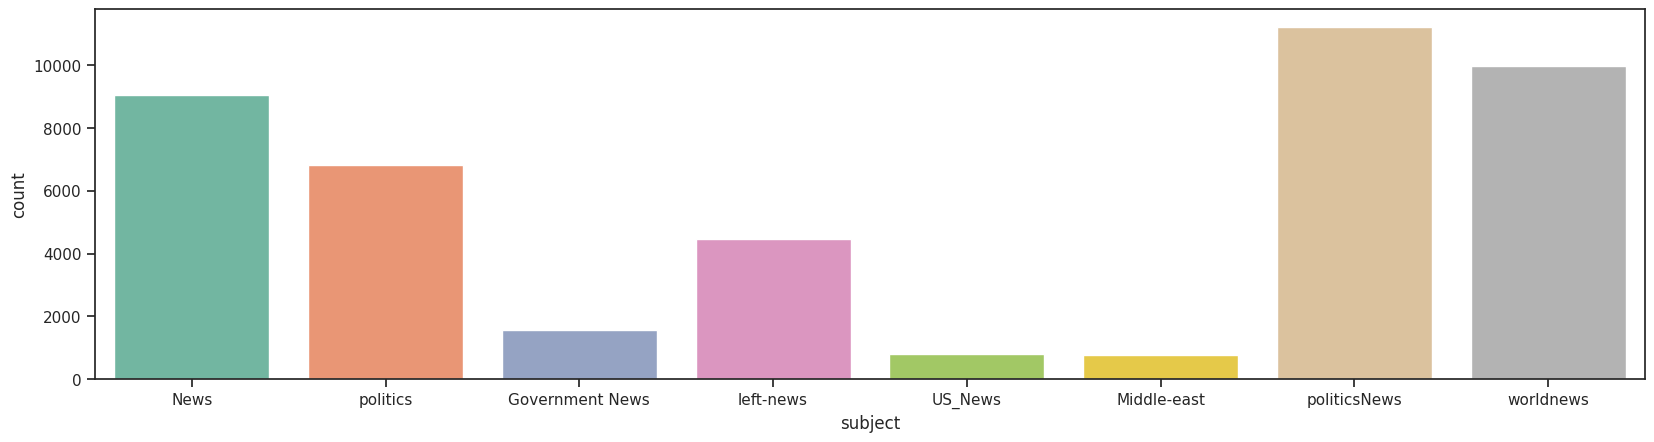

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="ticks", color_codes=True)

# Set the figure dimensions
fig_dims = (20, 4.8)
fig, ax = plt.subplots(figsize=fig_dims)

# Create a count plot for the 'subject' column with different colors
sns.countplot(x='subject', data=df, ax=ax, palette="Set2")

# Display the plot
plt.show()



In [30]:
df_fake['label']=0
df_true['label']=1

In [31]:
df_train=pd.merge(df_fake,df_true,how='outer')

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

**Remove stopwords and punctuations**


In [36]:
import string
import nltk

In [37]:
from nltk.corpus import stopwords

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
def text_process(text):
    # Remove punctuation from the text
    no_punctuation = [char for char in text if char not in string.punctuation]

    # Join the characters back into a single string
    no_punctuation = ''.join(no_punctuation)

    # Remove stopwords and return the cleaned text
    return [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]


**Model Training**

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_train['title'], df_train['label'], test_size=0.2, random_state=42)

In [42]:
news_classifier = Pipeline([
    ('vectorizer', CountVectorizer(analyzer=text_process)),  # Convert text to a matrix of token counts
    ('tfidf', TfidfTransformer()),  # Transform the count matrix to a normalized tf-idf representation
    ('classifier', MLPClassifier(solver='adam', activation='tanh', random_state=1, max_iter=200, early_stopping=True))  # Define the MLP Classifier
])

In [43]:
news_classifier.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(analyzer=<function text_process at 0x7aea0b36d870>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 MLPClassifier(activation='tanh', early_stopping=True,
                               random_state=1))])

**Model Evaluation**

In [44]:
predicted=news_classifier.predict(X_test)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(predicted,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4731
           1       1.00      1.00      1.00      4207

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



**Deployment**

In [49]:
import joblib
from flask import Flask, request, jsonify
import traceback
import sys

# Initialize the Flask app
app = Flask(__name__)

# Load the trained model
model = None
try:
    model = joblib.load('model.pkl')
    print('Model loaded')
except Exception as e:
    print('Error loading the model:', str(e))

# Define the predict route
@app.route('/predict', methods=['POST'])
def predict():
    if model:
        try:
            # Get JSON data from the request
            json_ = request.json
            print('Received JSON data:', json_)

            # Make prediction
            prediction = model.predict([json_])

            # Return the prediction as JSON
            return jsonify({'prediction': str(prediction)})

        except Exception as e:
            # Return the traceback in case of an error
            return jsonify({'trace': traceback.format_exc()})

    else:
        print('Train the model first')
        return 'No model here to use'

# Run the Flask app
if __name__ == '__main__':
    try:
        port = int(sys.argv[1])  # Command-line port input
    except:
        port = 12345  # Default port if not provided

    app.run(port=port, debug=True)


Error loading the model: [Errno 2] No such file or directory: 'model.pkl'
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:12345
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [50]:
# Example news title to predict
news_title = ['Man has now landed on Mars']

# Make prediction using the trained news_classifier
prediction = news_classifier.predict(news_title)

# Print the prediction
print(prediction)


[0]
